# 1. Chargement des donn√©es

In [674]:
import pandas as pd

# Charger le jeu de donn√©es
df = pd.read_csv("dataDiab√®te.csv")

# Aper√ßu de la structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2

In [675]:
df = df.drop('Unnamed: 0', axis=1)

le df apr√®s la suppression de la colonne Unnamed

# 2. Analyse exploratoire des donn√©es (EDA)

**2.1 V√©rification des dimensions et types**

In [676]:
print("Dimensions :", df.shape)
print("Types de donn√©es :", df.dtypes)

Dimensions : (768, 8)
Types de donn√©es : Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


**2.2 Valeurs manquantes**

In [677]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


aucun valeurs manquantes

**2.3 Doublons**

In [678]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


**2.4 Distribution des variables num√©riques**

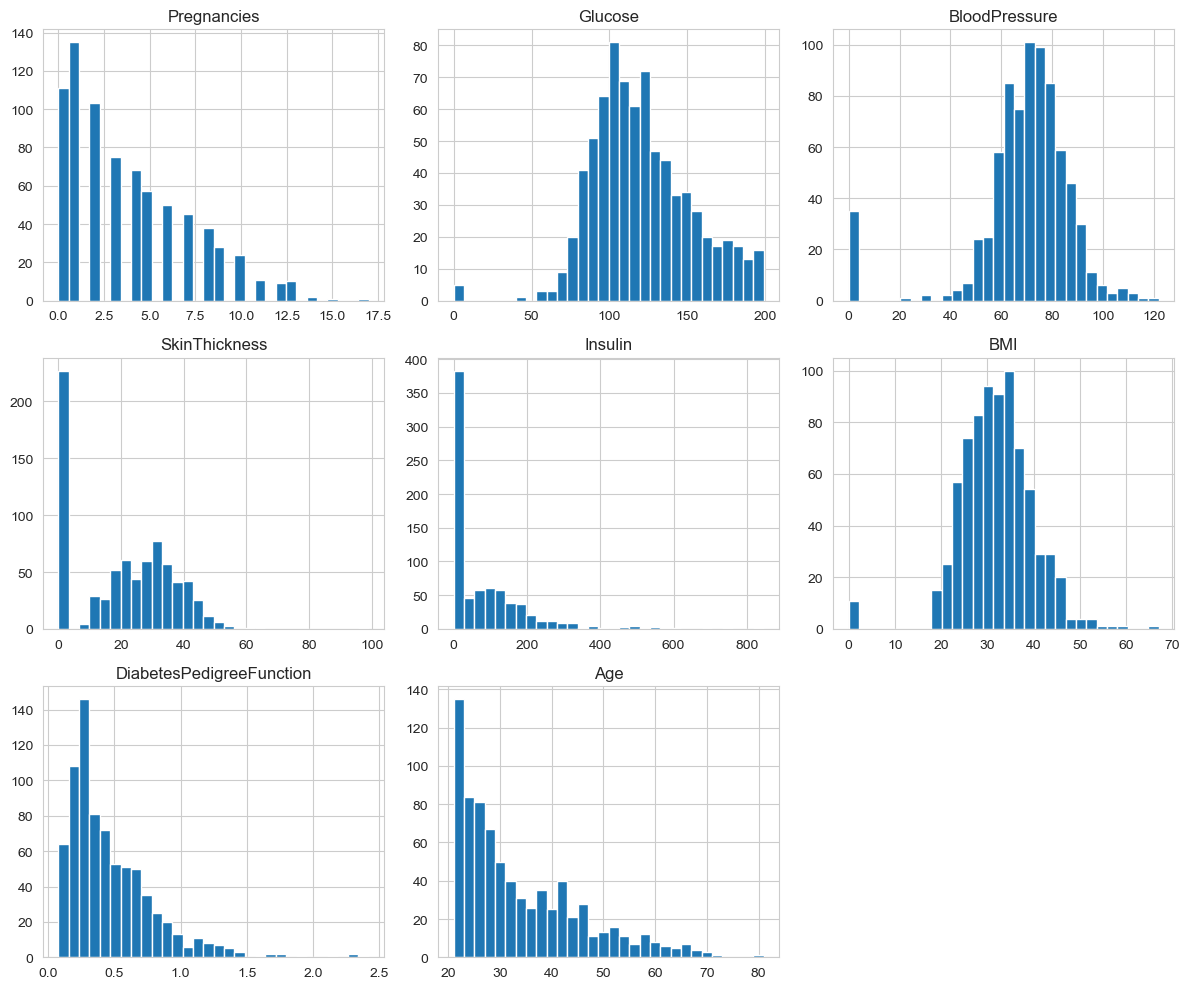

In [679]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


**2.5 Corr√©lation entre variables**

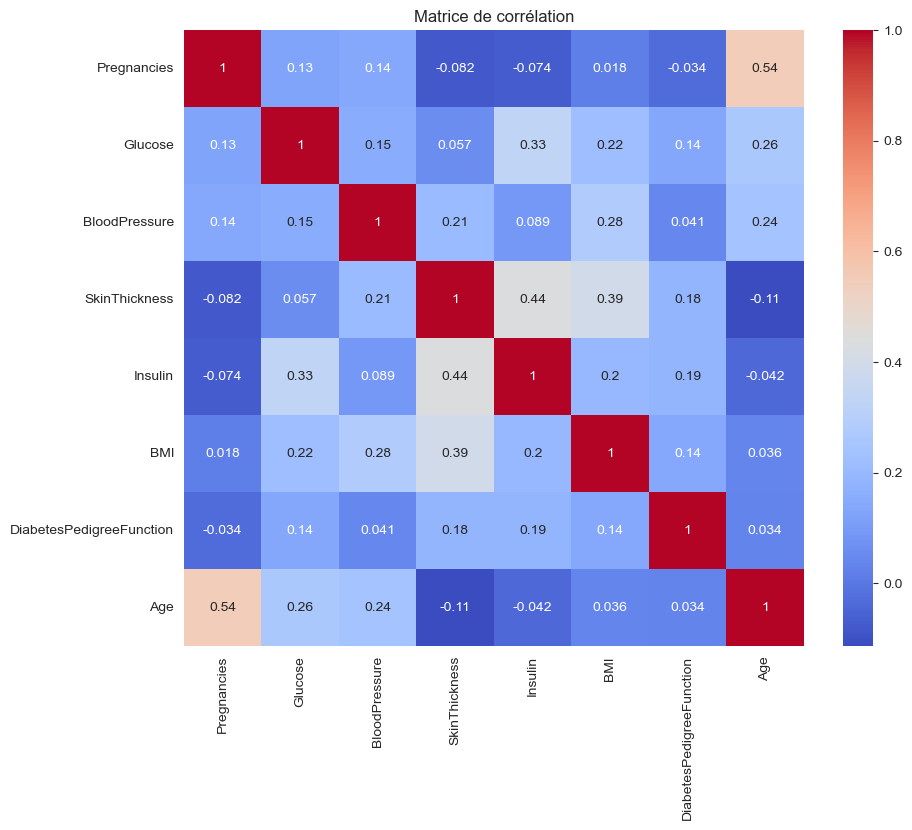

In [680]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corr√©lation")
plt.show()


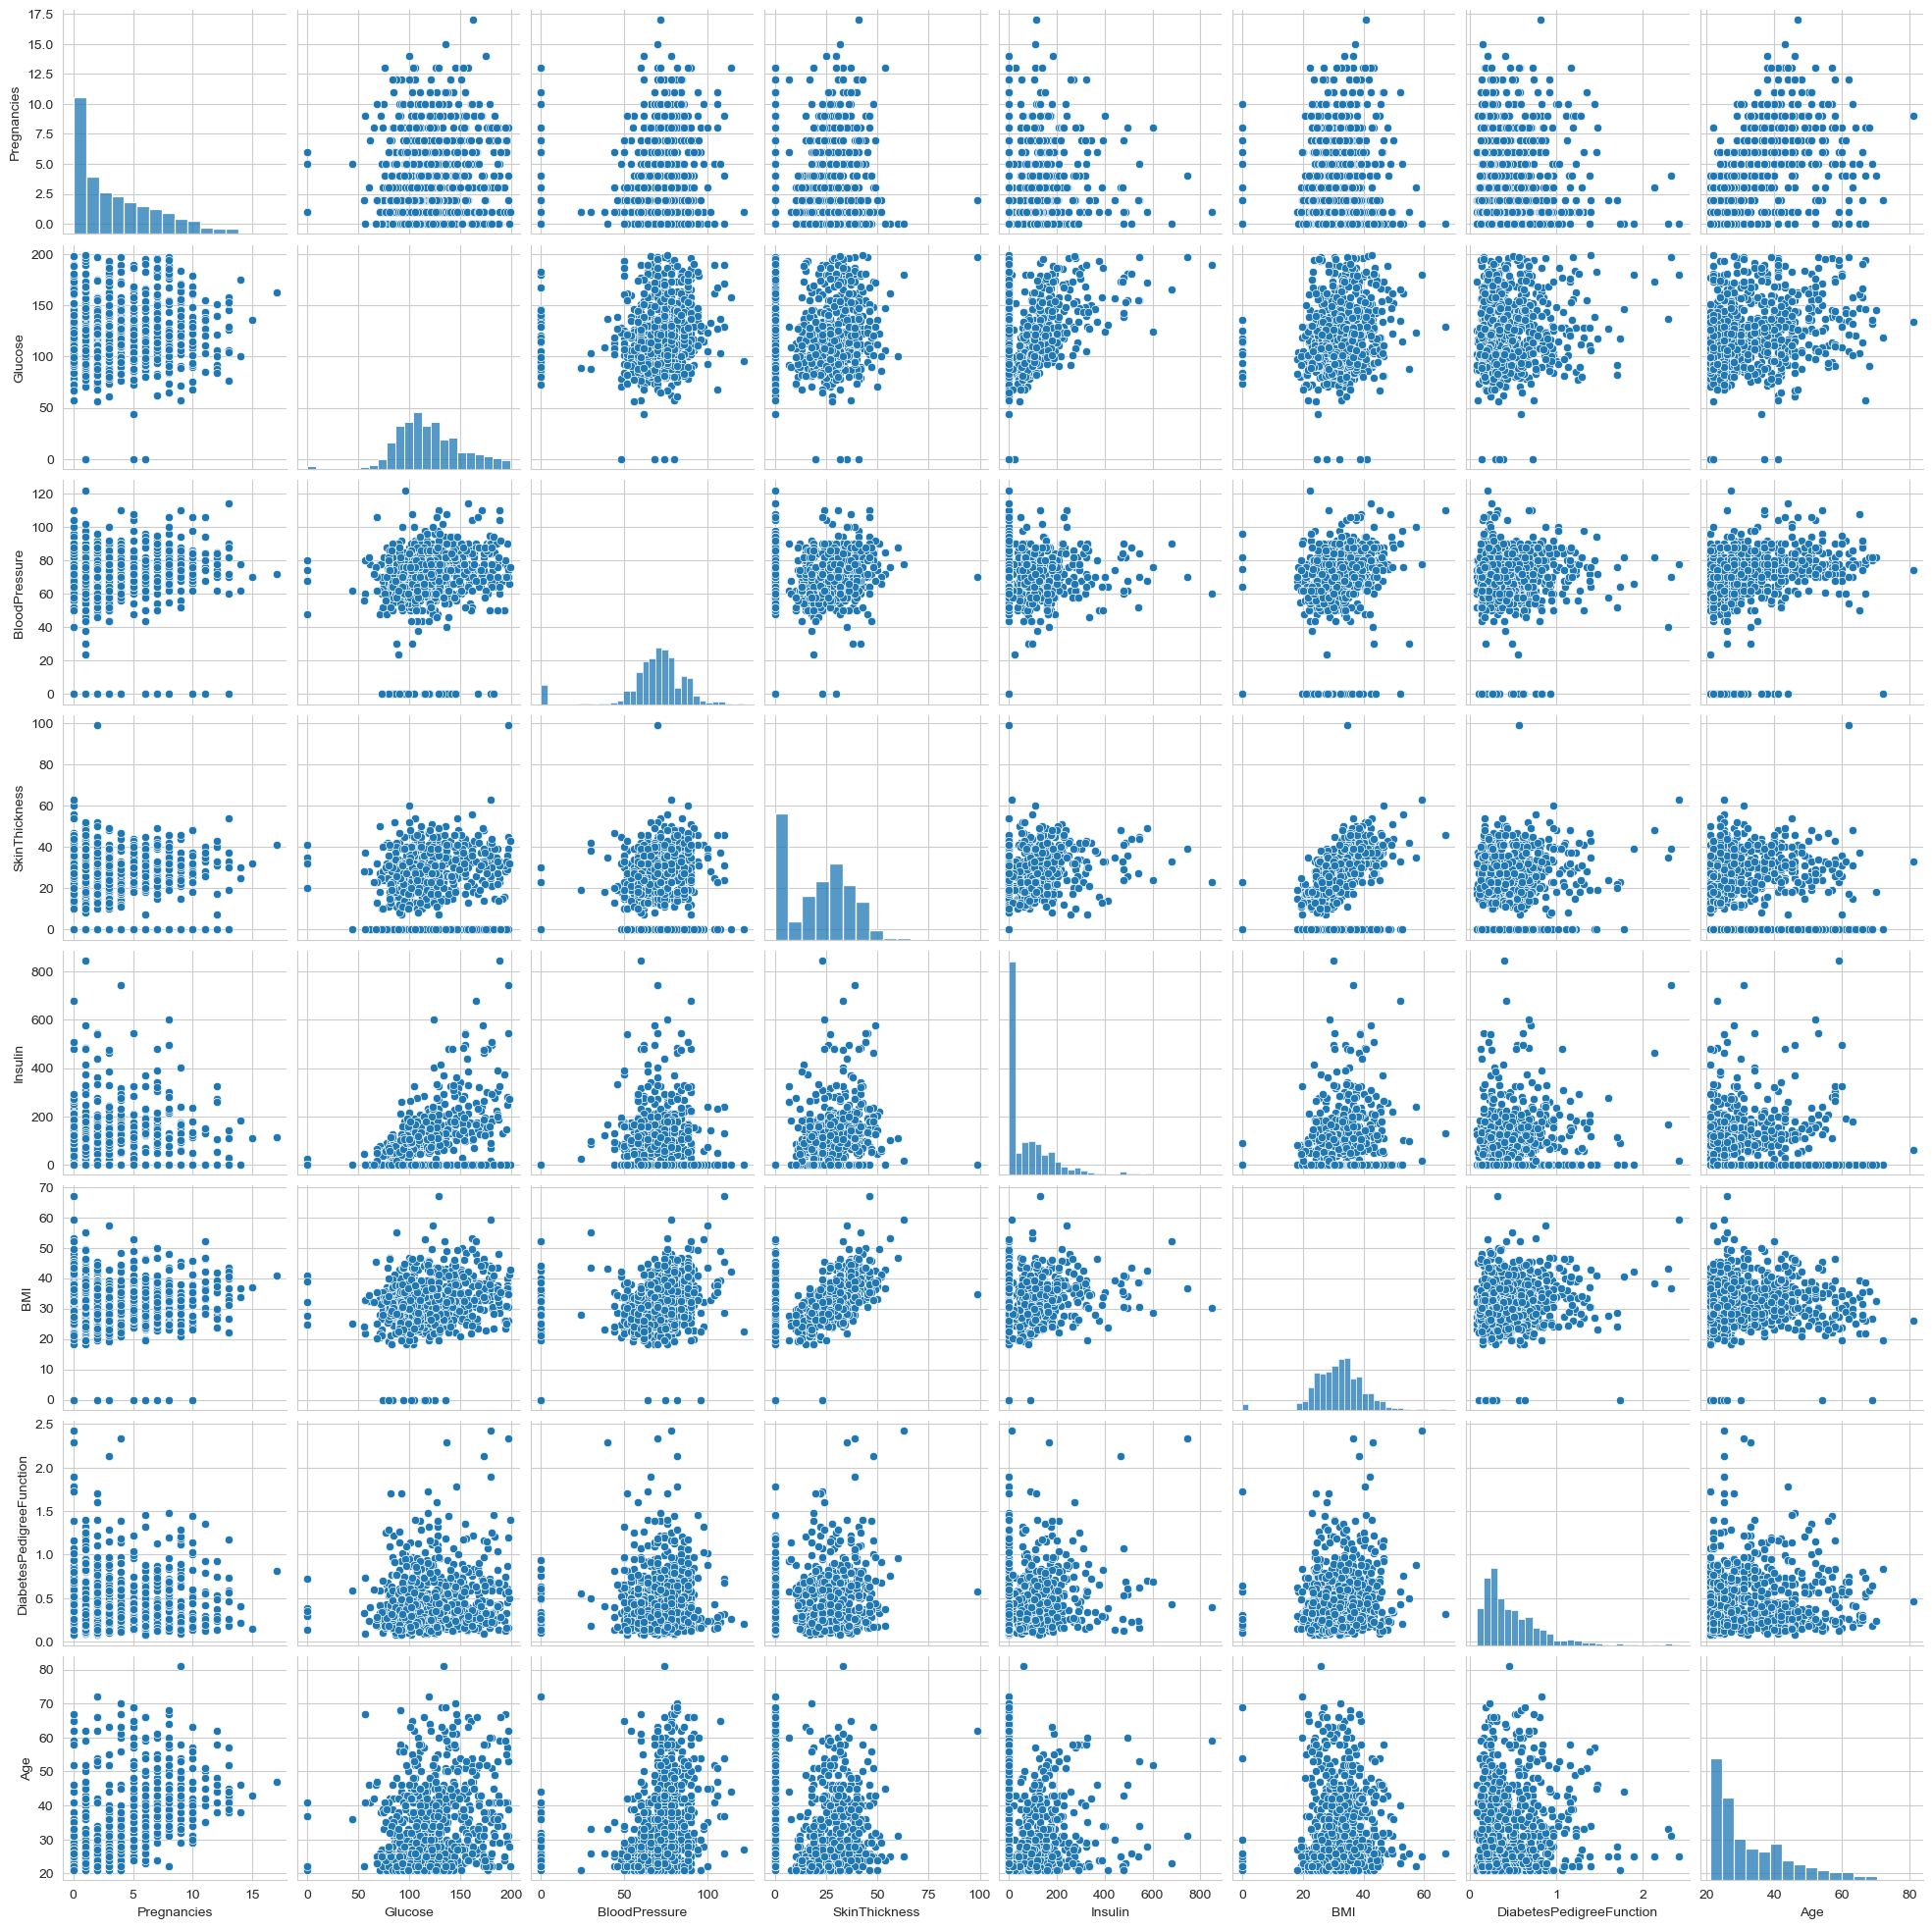

In [681]:
sns.pairplot(df)
plt.show()

# 3. Pr√©traitement des donn√©es

**3.1 Gestion des valeurs manquantes**


rien a supp puisqu'il n'existe plus

**3.2 D√©tection et suppression des valeurs aberrantes**

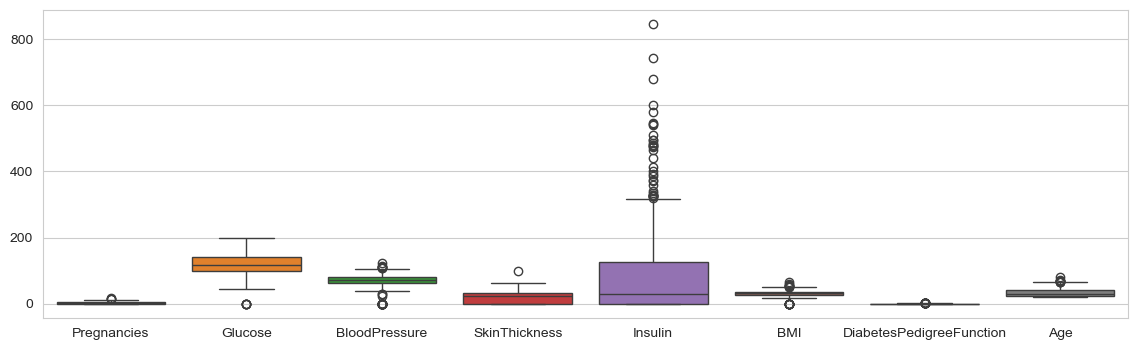

In [682]:
#bo√Æte √† moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

Ces graphiques sont excellents pour visualiser la distribution, la dispersion et la pr√©sence de valeurs aberrantes (outliers) dans chaque variable.

- Pregnancies (Grossesses) Distribution : Tr√®s concentr√©e vers des valeurs faibles (0-5 environ). La m√©diane semble √™tre autour de 1-2.
- Glucose (Glucose) Distribution : La bo√Æte est large, indiquant une bonne dispersion. La m√©diane est autour de 110-120
- BloodPressure (Tension Art√©rielle) Distribution : La m√©diane est autour de 70-75. La bo√Æte est de taille moyenne
- SkinThickness (√âpaisseur de la Peau) Distribution : M√©diane autour de 20-25. La bo√Æte est de taille moyenne
- BMI (Indice de Masse Corporelle) Distribution : La m√©diane est autour de 30-35. La bo√Æte est de taille moyenne.

In [683]:
#IQR
for colom in df.columns:
    Q1 = df[colom].quantile(0.25)
    Q3 = df[colom].quantile(0.75)
    IQR = Q3 - Q1
    Borne_min = Q1 - 1.5 * IQR
    Borne_max = Q3 + 1.5 * IQR
    df = df[(df[colom] >= Borne_min) & (df[colom] <= Borne_max)]

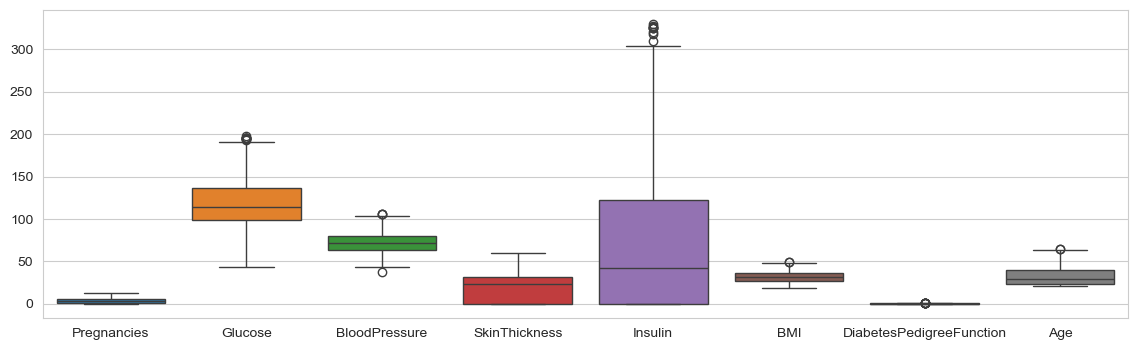

In [684]:
#bo√Æte √† moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

In [685]:
variance_by_column = df.var()
print("\n--- Variance de chaque variable num√©rique ---")
print(variance_by_column)


--- Variance de chaque variable num√©rique ---
Pregnancies                   10.571525
Glucose                      840.812863
BloodPressure                127.714899
SkinThickness                232.004308
Insulin                     6989.270567
BMI                           40.757138
DiabetesPedigreeFunction       0.060068
Age                          118.370195
dtype: float64


Une forte variance indique que les points de donn√©es sont tr√®s √©loign√©s de la moyenne et les uns des autres, tandis qu'une faible variance indique qu'ils sont group√©s autour de la moyenne.

- Insulin (tr√®s √©lev√©) : Confirme la forte dispersion et la pr√©sence d'outliers. N√©cessitera tr√®s probablement une mise √† l'√©chelle et potentiellement une transformation pour les mod√®les

- Glucose, SkinThickness, BloodPressure, Age : Ont des variances plus √©lev√©es qui justifient √©galement une mise √† l'√©chelle pour la plupart des algorithmes de machine learning afin d'√©viter qu'elles ne dominent le processus d'apprentissage.

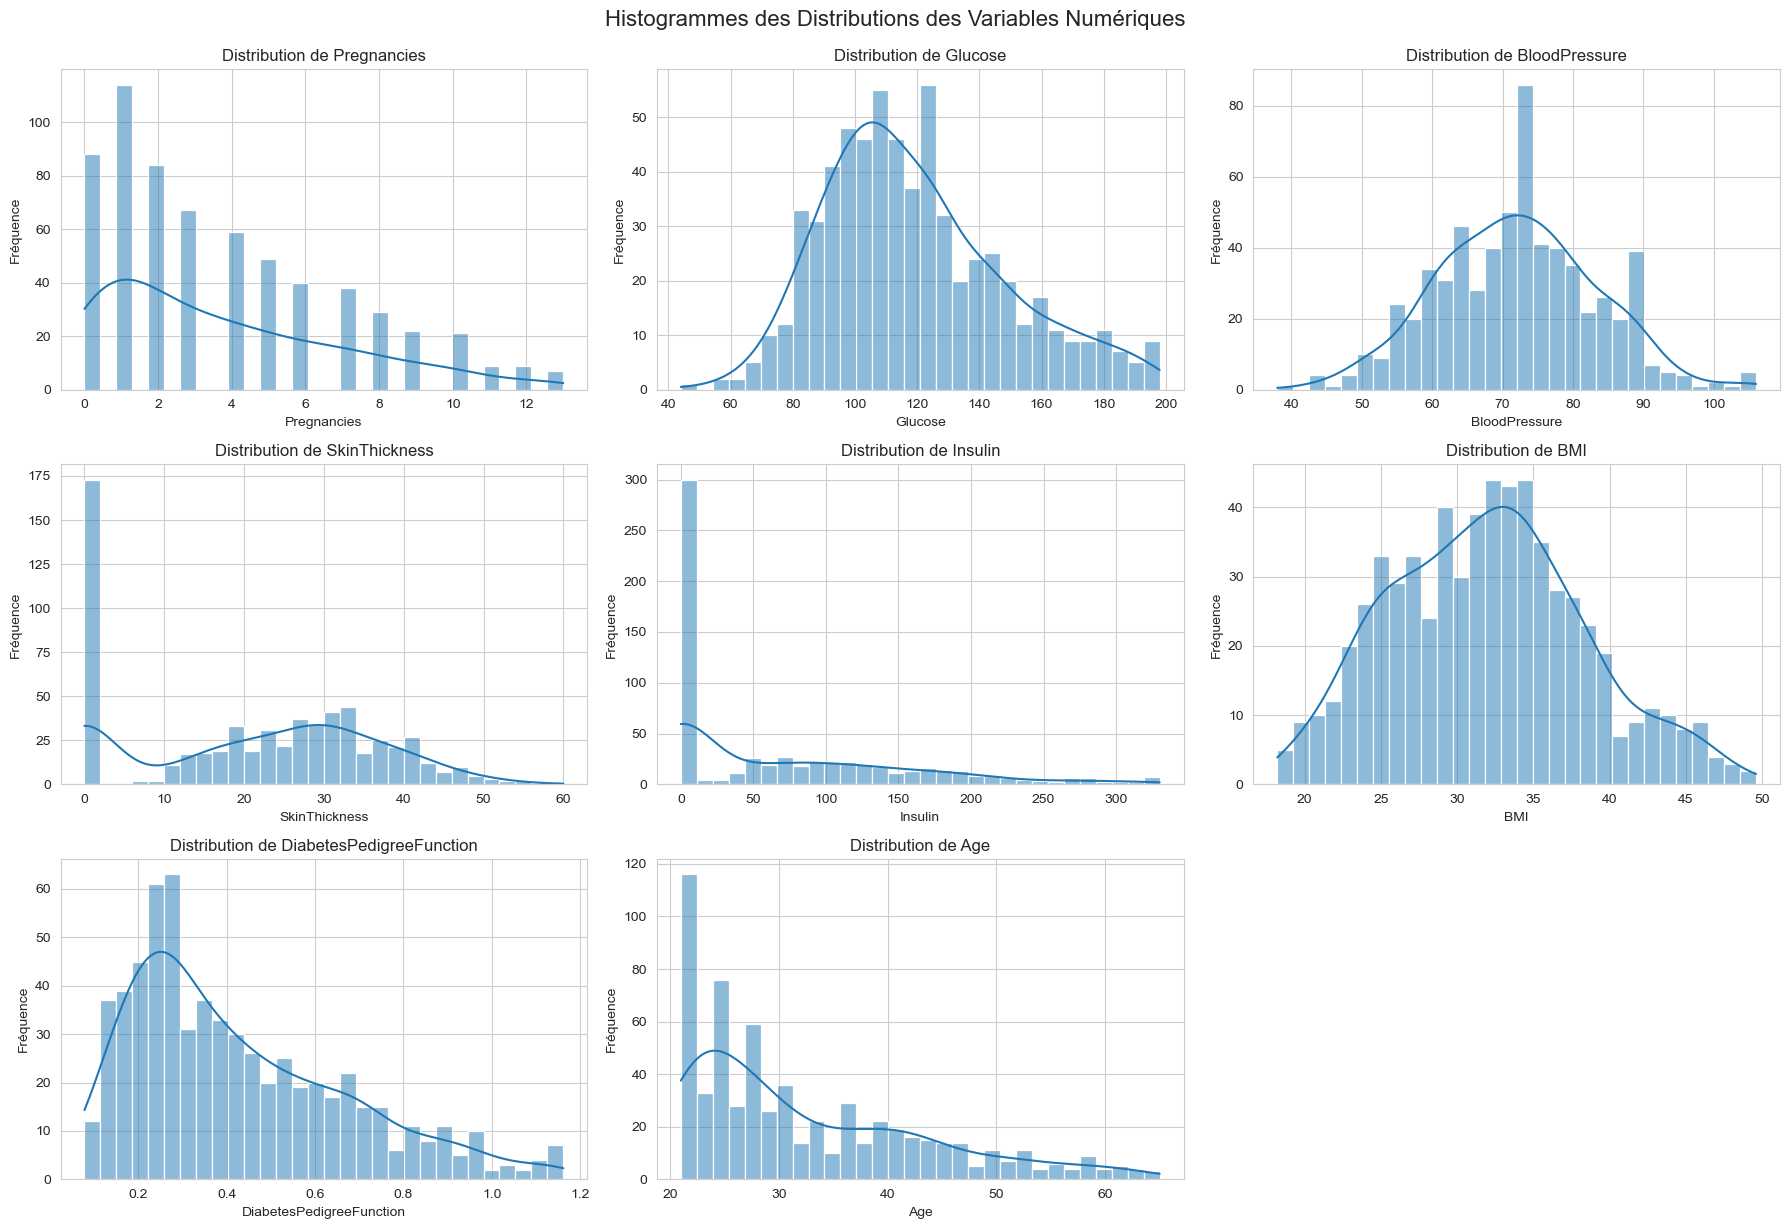

In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid") # (optionnel, pour une meilleure esth√©tique)
num_cols = df.select_dtypes(include=np.number).shape[1]
n_rows = (num_cols + 2) // 3 # Arrondi sup√©rieur pour avoir assez de lignes (3 colonnes par ligne)
n_cols = 3 # Affichons 3 histogrammes par ligne
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4)) # Taille de la figure globale
axes = axes.flatten() # Aplatir le tableau d'axes pour it√©rer facilement

# Boucler sur chaque colonne num√©rique du DataFrame
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    if i < len(axes): # S'assurer que nous ne d√©passons pas le nombre d'axes disponibles
        sns.histplot(df[col], kde=True, ax=axes[i], bins=30) # kde=True ajoute une estimation de densit√© de noyau
        axes[i].set_title(f'Distribution de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Fr√©quence')

# Supprimer les axes vides si le nombre de sous-graphiques n'est pas un multiple de n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Ajuster l'agencement pour √©viter les chevauchements
plt.suptitle('Histogrammes des Distributions des Variables Num√©riques', y=1.02, fontsize=16) # Titre g√©n√©ral
plt.show()


Ces histogrammes montrent la distribution de chaque variable apr√®s nettoyage et imputation. On observe des asym√©tries notables (Insulin, DiabetesPedigreeFunction) et des √©chelles variables, n√©cessitant une attention particuli√®re pour la mise √† l'√©chelle et d'√©ventuelles transformations avant la mod√©lisation.

**4. S√©lection des variables pour le clustering**

In [687]:
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_selected = df[features]

In [688]:
df_selected

Glucose   BMI  Age  DiabetesPedigreeFunction
0        148  33.6   50                     0.627
1         85  26.6   31                     0.351
2        183  23.3   32                     0.672
3         89  28.1   21                     0.167
5        116  25.6   30                     0.201
..       ...   ...  ...                       ...
763      101  32.9   63                     0.171
764      122  36.8   27                     0.340
765      121  26.2   30                     0.245
766      126  30.1   47                     0.349
767       93  30.4   23                     0.315

[636 rows x 4 columns]

**5. Visualisation des relations entre variables**

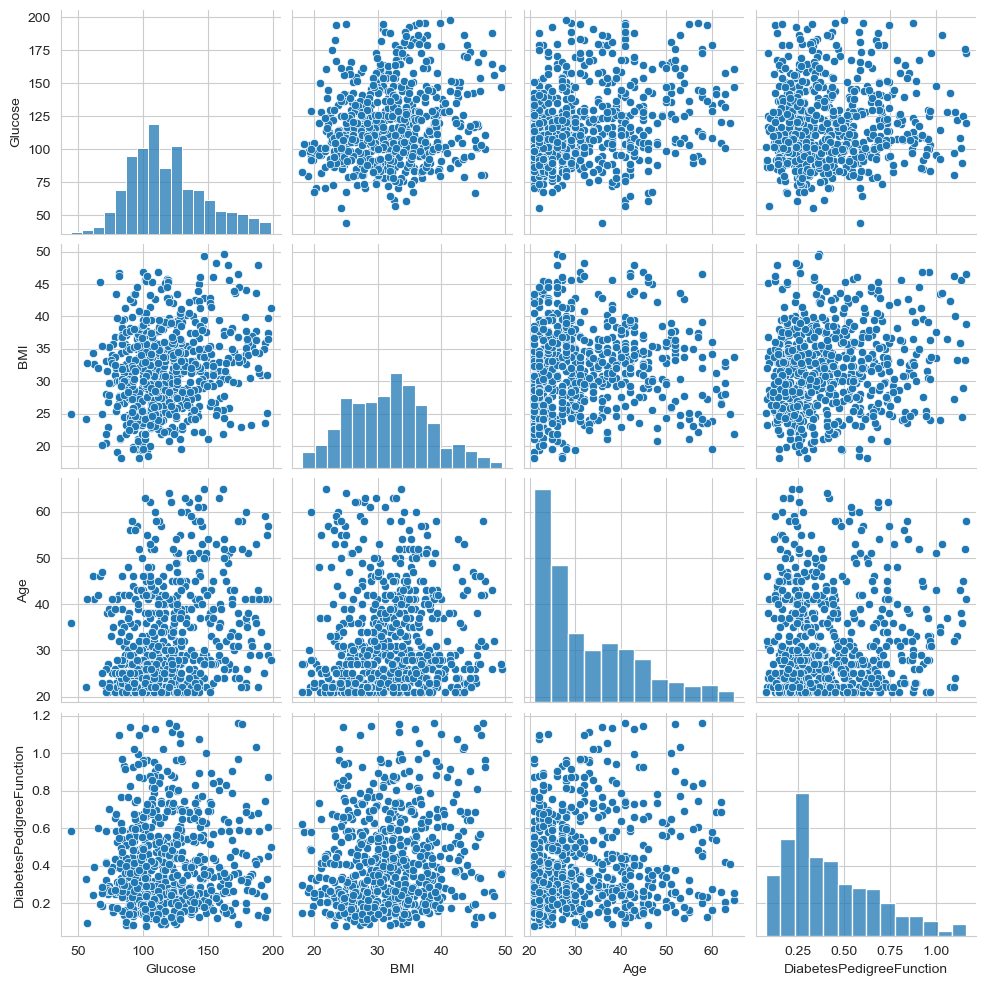

In [652]:
sns.pairplot(df_selected)
plt.show()

**6. Mise √† l‚Äô√©chelle des variables**

In [689]:
from sklearn.preprocessing import StandardScaler
import joblib

clustering_cols = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_clustering = df[clustering_cols].copy()

# Initialiser le StandardScaler
scaler = StandardScaler()

# C'est ici que le scaler "apprend" les statistiques (moyenne, √©cart-type) de vos donn√©es.
X_scaled = scaler.fit_transform(df_clustering)

# Convertir le tableau NumPy mis √† l'√©chelle en DataFrame (facultatif pour le scaler)
X_scaled = pd.DataFrame(X_scaled, columns=clustering_cols)

# --- TR√àS IMPORTANT : SAUVEGARDEZ L'OBJET SCALER ENTRA√éN√â ---
joblib.dump(scaler, 'scaler.pkl')
print("Scaler sauvegard√© sous scaler.pkl")


Scaler sauvegard√© sous scaler.pkl


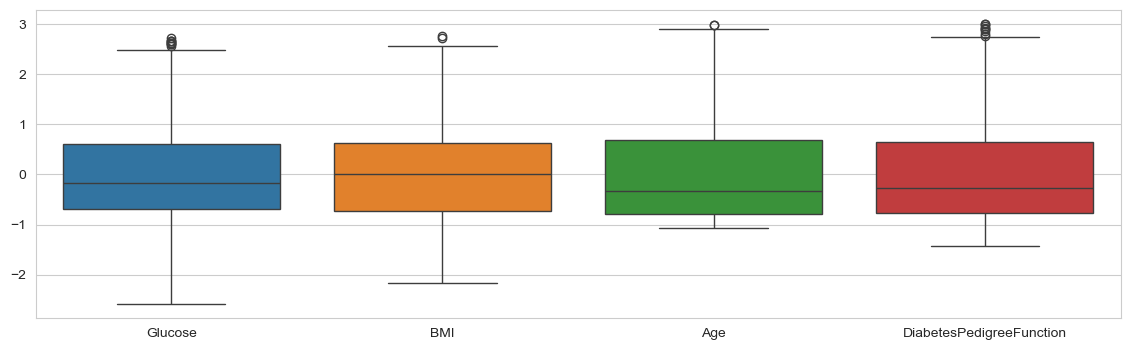

In [690]:
#bo√Æte √† moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(X_scaled)
plt.show()

In [691]:
X_scaled

Glucose       BMI       Age  DiabetesPedigreeFunction
0    1.005403  0.256438  1.604688                  0.819791
1   -1.168963 -0.840893 -0.143041                 -0.307223
2    2.213384 -1.358207 -0.051055                  1.003543
3   -1.030908 -0.605751 -1.062898                 -1.058566
4   -0.099037 -0.997655 -0.235026                 -0.919731
..        ...       ...       ...                       ...
631 -0.616743  0.146705  2.800503                 -1.042232
632  0.108045  0.758076 -0.510984                 -0.352141
633  0.073532 -0.903598 -0.235026                 -0.740062
634  0.246100 -0.292227  1.328731                 -0.315390
635 -0.892853 -0.245199 -0.878927                 -0.454225

[636 rows x 4 columns]

√âchelle Homog√®ne : Toutes les variables (Glucose, BMI, Age, DiabetesPedigreeFunction, et toute autre colonne standardis√©e) sont maintenant sur la m√™me √©chelle. Leurs valeurs varient g√©n√©ralement entre -3 et +3 (environ) avec une moyenne de 0 et un √©cart-type de 1


# 6. clustering K-Means

In [692]:
from sklearn.cluster import KMeans

In [693]:
import os
os.environ["OMP_NUM_THREADS"] = "3"  # 1, 2 ou 3
from sklearn.cluster import KMeans

**6. D√©termination de la valeur optimale de k (m√©thode du coude)**

In [694]:
inertias = []  # liste pour stocker l'inertie pour chaque k

k_range = range(1, 8)  # on teste les valeurs de k de 1 √† 8

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # inertie = somme des distances intra-cluster

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

üìå L'avertissement signale que l'impl√©mentation de KMeans dans scikit-learn peut pr√©senter une "fuite de m√©moire" (memory leak) sur les syst√®mes d'exploitation Windows, surtout lorsqu'elle utilise la biblioth√®que MKL (Math Kernel Library) d'Intel.

**6.2 Tracer la courbe du coude**

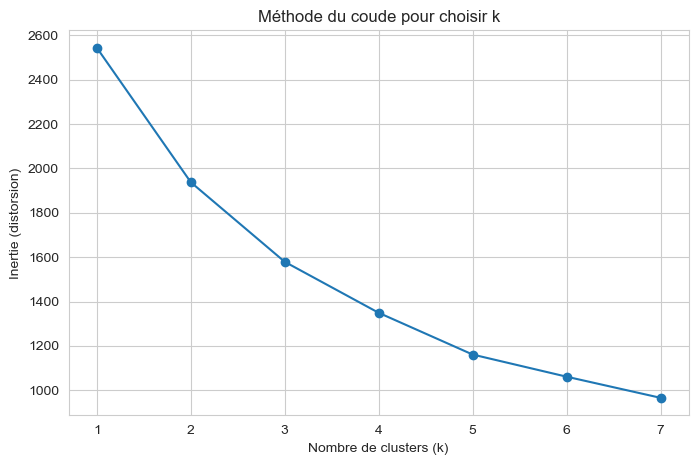

In [695]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("M√©thode du coude pour choisir k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (distorsion)")
plt.grid(True)
plt.show()

L'inertie, aussi appel√©e somme des carr√©s des erreurs intra-cluster (WCSS - Within-Cluster Sum of Squares), mesure la dispersion des points de donn√©es √† l'int√©rieur de leurs clusters respectifs. Plus l'inertie est faible, plus les points sont proches des centro√Ødes de leurs clusters, et donc plus les clusters sont "compacts".

--> Le but de la m√©thode du coude est de trouver le point sur la courbe o√π la diminution de l'inertie commence √† ralentir de mani√®re significative, formant un "coude" ou une "cassure" distincte. Au-del√† de ce point, ajouter plus de clusters n'apporte plus un gain substantiel en termes de r√©duction de l'inertie.

**6.3 Entra√Ænement du mod√®le K-Means avec le k optimal**

In [696]:
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**6.4 Ajouter une colonne Cluster au dataset original**

In [697]:
X_scaled['Cluster'] = clusters

**6.5 Visualiser la r√©partition des observations par cluster**

In [698]:
print(X_scaled['Cluster'].value_counts())

Cluster
1    383
0    253
Name: count, dtype: int64


Cette sortie est un peu ambig√ºe en termes de format, mais elle indique une r√©partition des observations dans diff√©rents clusters.

C:\Users\PC\AppData\Local\Temp\ipykernel_7208\2210925354.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


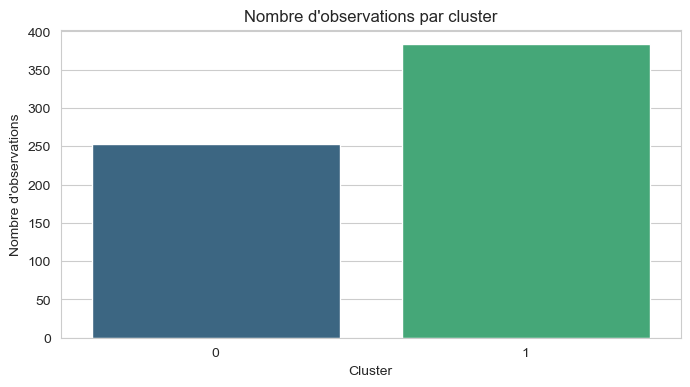

In [699]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()

# Visualisation
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Nombre d'observations par cluster")
plt.xlabel("Cluster")
plt.ylabel("Nombre d'observations")
plt.show()

affichage des distrubution des clustre

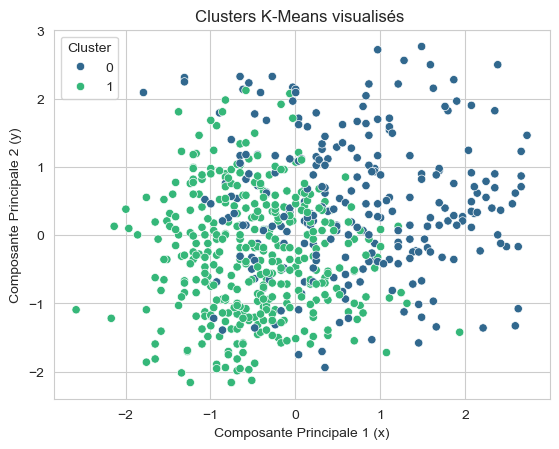

In [700]:
sns.scatterplot(x=X_scaled.iloc[:, 0], y=X_scaled.iloc[:, 1], hue=X_scaled['Cluster'], palette='viridis')
plt.title('Clusters K-Means visualis√©s ')
plt.xlabel('Composante Principale 1 (x)')
plt.ylabel('Composante Principale 2 (y)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 7 R√©duction de dimensionnalit√© pour visualisation

**7.1 Appliquer l‚ÄôACP (PCA) pour r√©duire les dimensions √† 3 axes.**

In [701]:
print(X_scaled.columns)
X_scaled.head(10)

Index(['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Cluster'], dtype='object')


Glucose       BMI       Age  DiabetesPedigreeFunction  Cluster
0  1.005403  0.256438  1.604688                  0.819791        0
1 -1.168963 -0.840893 -0.143041                 -0.307223        1
2  2.213384 -1.358207 -0.051055                  1.003543        0
3 -1.030908 -0.605751 -1.062898                 -1.058566        1
4 -0.099037 -0.997655 -0.235026                 -0.919731        1
5 -1.410559 -0.151142 -0.602969                 -0.727812        1
6 -0.306120  0.883485 -0.235026                 -0.960565        1
7  1.695677  0.946190  0.132917                  0.452286        0
8  1.626650 -0.966303  1.696674                  0.656455        0
9 -0.030010  2.168931 -0.143041                  0.509454        0

In [702]:
from sklearn.decomposition import PCA

# Appliquer PCA pour r√©duire les dimensions √† 3 axes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Cr√©er un DataFrame pour les composants principaux
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

print("\nDataFrame PCA avec les deux premi√®res composantes principales et les clusters :")
print(df_pca.head(10))

print(f"\nVariance expliqu√©e par les deux premi√®res composantes principales : {pca.explained_variance_ratio_.sum()*100:.2f}%")


DataFrame PCA avec les deux premi√®res composantes principales et les clusters :
        PC1       PC2
0  1.968249 -0.262208
1 -1.346802 -0.276970
2  1.143455 -0.394823
3 -1.840072 -0.326644
4 -0.984856 -0.982527
5 -1.538285 -0.000250
6 -0.294468 -0.087736
7  1.804367  0.310692
8  1.808775 -1.127398
9  1.185266  1.418213

Variance expliqu√©e par les deux premi√®res composantes principales : 61.86%


**7.2 R√©entra√Æner le mod√®le K-Means sur les nouvelles dimensions**

In [703]:
# R√©entra√Æner K-Means sur les donn√©es PCA pour la visualisation
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_pca.fit(df_pca[['PC1', 'PC2']])

# Ajouter les nouveaux labels de cluster bas√©s sur PCA au DataFrame PCA
df_pca['Cluster_PCA'] = kmeans_pca.labels_

print(f"\nMod√®le K-Means r√©entra√Æn√© sur les donn√©es PCA avec {2} clusters.")
print("Aper√ßu du DataFrame PCA avec les clusters recalcul√©s :")
print(df_pca.head(10))


Mod√®le K-Means r√©entra√Æn√© sur les donn√©es PCA avec 2 clusters.
Aper√ßu du DataFrame PCA avec les clusters recalcul√©s :
        PC1       PC2  Cluster_PCA
0  1.968249 -0.262208            0
1 -1.346802 -0.276970            1
2  1.143455 -0.394823            0
3 -1.840072 -0.326644            1
4 -0.984856 -0.982527            1
5 -1.538285 -0.000250            1
6 -0.294468 -0.087736            1
7  1.804367  0.310692            0
8  1.808775 -1.127398            0
9  1.185266  1.418213            0


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**7.3 Visualiser les clusters obtenus et analyser la distribution**

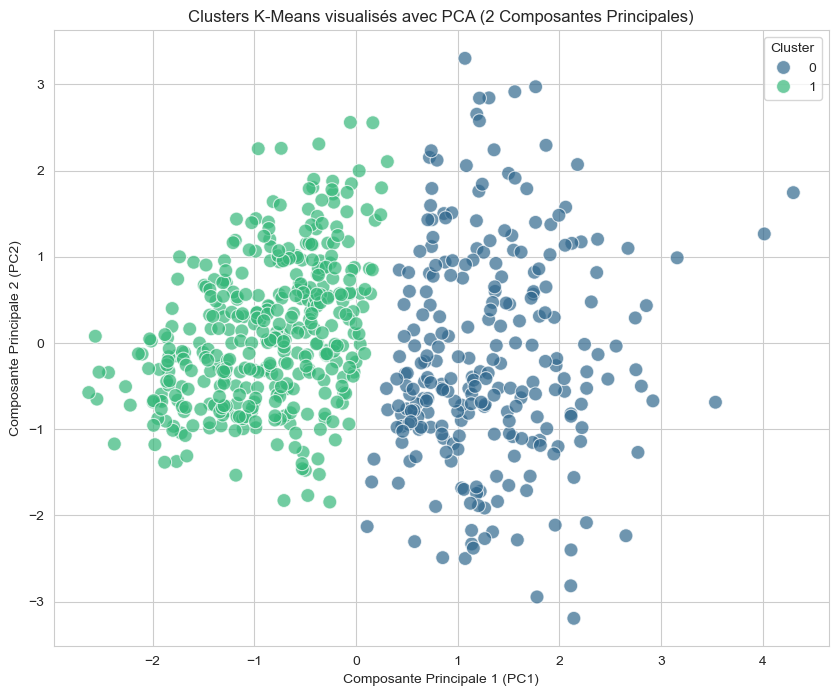


Le graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.


In [704]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters K-Means visualis√©s avec PCA (2 Composantes Principales)')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

print("\nLe graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.")

**8 Analyse des clusters**

**8.1 Calculer les moyennes des caract√©ristiques au sein de chaque cluster**

In [705]:
df_reset = X_scaled.reset_index(drop=True)

df_analysis = pd.concat([df_reset[features].loc[df_pca.index], df_pca['Cluster_PCA']], axis=1).copy()
# Moyennes par cluster et Ajout d'une colonne de risque
cluster_means = df_analysis.groupby('Cluster_PCA')[features].mean()
df_analysis['risk_category'] = df_analysis['Cluster_PCA'].apply(lambda x: 1 if cluster_means.loc[x, 'Glucose'] > 126 and cluster_means.loc[x, 'BMI'] > 30 and cluster_means.loc[x, 'DiabetesPedigreeFunction'] > 0.5 else 0)

print(df_analysis['risk_category'].value_counts()) # Nombre par cat√©gorie
print("\nMoyennes des caract√©ristiques par cluster :")
cluster_means = df_analysis.groupby('Cluster_PCA')[features].mean()
print(cluster_means)

risk_category
0    636
Name: count, dtype: int64

Moyennes des caract√©ristiques par cluster :
              Glucose       BMI       Age  DiabetesPedigreeFunction
Cluster_PCA                                                        
0            0.725746  0.465805  0.801177                  0.236399
1           -0.479409 -0.307699 -0.529237                 -0.156159


D'apr√®s ces moyennes, il semble que notre clustering ait r√©ussi √† s√©parer au moins deux groupes distincts bas√©s sur les caract√©ristiques que nous avons fournies :

- Un groupe (Cluster 0) avec des caract√©ristiques g√©n√©ralement "plus √©lev√©es" (√¢ge, glucose, BMI, risque familial).
- Un autre groupe (Cluster 1) avec des caract√©ristiques g√©n√©ralement "plus basses" sur les m√™mes dimensions.

C'est une diff√©renciation clinique tr√®s pertinente dans le contexte des facteurs de risque de diab√®te

**8.2 Compter le nombre d‚Äôobservations par groupe**

In [706]:
print("\nNombre d'observations par cluster :")
cluster_counts = df_analysis['Cluster_PCA'].value_counts().sort_index()
print(cluster_counts)


Nombre d'observations par cluster :
Cluster_PCA
0    253
1    383
Name: count, dtype: int64


**8.3 Ajouter une colonne risk_category bas√©e sur le num√©ro de cluster**

In [707]:
df_analysis['risk_category'] = df_analysis['Cluster_PCA'].apply(lambda x: 'High Risk' if x == 1 else 'Low Risk' )

print("\nDataFrame avec la nouvelle colonne 'risk_category':")
print(df_analysis[['Glucose', 'BMI', 'Age', 'Cluster_PCA', 'risk_category']].head())

print("\nR√©partition des patients par cat√©gorie de risque :")
print(df_analysis['risk_category'].value_counts())


DataFrame avec la nouvelle colonne 'risk_category':
    Glucose       BMI       Age  Cluster_PCA risk_category
0  1.005403  0.256438  1.604688            0      Low Risk
1 -1.168963 -0.840893 -0.143041            1     High Risk
2  2.213384 -1.358207 -0.051055            0      Low Risk
3 -1.030908 -0.605751 -1.062898            1     High Risk
4 -0.099037 -0.997655 -0.235026            1     High Risk

R√©partition des patients par cat√©gorie de risque :
risk_category
High Risk    383
Low Risk     253
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_7208\1074196940.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='risk_category', data=df_analysis, order=['Low Risk', 'High Risk'], palette={'Low Risk':'green', 'High Risk':'red'})


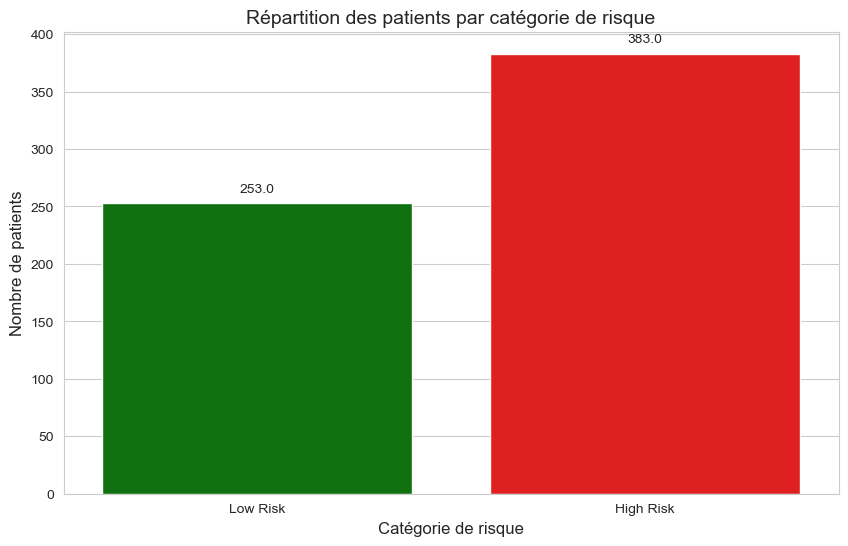

In [708]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cr√©ation de l'histogramme
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='risk_category', data=df_analysis, order=['Low Risk', 'High Risk'], palette={'Low Risk':'green', 'High Risk':'red'})

# Ajout des annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('R√©partition des patients par cat√©gorie de risque', fontsize=14)
plt.xlabel('Cat√©gorie de risque', fontsize=12)
plt.ylabel('Nombre de patients', fontsize=12)
plt.show()

**Interpr√©tation**

R√©partition globale :

- Low Risk: 253 patients (40%)
- High Risk: 383 patients (60%)

Analyse :

- La distribution est presque √©quilibr√©e avec un l√©ger avantage pour la cat√©gorie "Low Risk"
- Cette quasi-parit√© sugg√®re que votre mod√®le de classification a identifi√© deux populations distinctes Pour un probl√®me m√©dical, cette r√©partition semble r√©aliste (pas de d√©s√©quilibre extr√™me)

# 9 Pr√©paration des donn√©es pour la classification

**9.1 D√©finir la variable cible y √† partir de la colonne risk_category**

In [709]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = X_scaled.copy()
y = df_analysis['risk_category']

print(f"Forme de X : {X.shape}")
print(f"Forme de y : {y.shape}")
print("\nPremi√®res lignes de y :")
print(y.head())

Forme de X : (636, 5)
Forme de y : (636,)

Premi√®res lignes de y :
0     Low Risk
1    High Risk
2     Low Risk
3    High Risk
4    High Risk
Name: risk_category, dtype: object


**9.2 Diviser les donn√©es en ensemble d‚Äôentra√Ænement et de test**

In [710]:
# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nForme de X_train : {X_train.shape}")
print(f"Forme de X_test : {X_test.shape}")
print(f"Forme de y_train : {y_train.shape}")
print(f"Forme de y_test : {y_test.shape}")

print("\nR√©partition des classes dans l'ensemble d'entra√Ænement avant sur-√©chantillonnage :")
print(Counter(y_train))


Forme de X_train : (445, 5)
Forme de X_test : (191, 5)
Forme de y_train : (445,)
Forme de y_test : (191,)

R√©partition des classes dans l'ensemble d'entra√Ænement avant sur-√©chantillonnage :
Counter({'High Risk': 268, 'Low Risk': 177})


**9.3 G√©rer le d√©s√©quilibre des classes avec des techniques de sur-√©chantillonnage**

In [711]:
# G√©rer le d√©s√©quilibre des classes avec RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("\nR√©partition des classes dans l'ensemble d'entra√Ænement apr√®s sur-√©chantillonnage :")
print(Counter(y_train_resampled))


R√©partition des classes dans l'ensemble d'entra√Ænement apr√®s sur-√©chantillonnage :
Counter({'High Risk': 268, 'Low Risk': 268})


# Entra√Ænement de plusieurs mod√®les de classification

Tester les algorithmes suivants :
- Random Forest
- Support Vector Machine (SVM)
- Gradient Boosting Decision Tree
- R√©gression Logistique

In [712]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Initialiser les mod√®les
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True), 
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear')
}

# Dictionnaire pour stocker les r√©sultats
results = {}

print("\n--- Entra√Ænement et √©valuation des mod√®les ---")
for name, model in models.items():
    print(f"\nEntra√Ænement du mod√®le : {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Stocker les pr√©dictions pour l'analyse ult√©rieure
    results[name] = {
        'model': model,
        'predictions': y_pred
    }

    # √âvaluation de base
    print(f"Performance de {name} sur l'ensemble de test :")
    print(classification_report(y_test, y_pred))
    print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred)}")

    # Calcul des m√©triques individuelles
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='High Risk') # Sp√©cifier le label positif
    recall = recall_score(y_test, y_pred, pos_label='High Risk')
    f1 = f1_score(y_test, y_pred, pos_label='High Risk')

    results[name]['metrics'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


--- Entra√Ænement et √©valuation des mod√®les ---

Entra√Ænement du mod√®le : Random Forest...
Performance de Random Forest sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00       115
    Low Risk       1.00      1.00      1.00        76

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

Matrice de confusion :
[[115   0]
 [  0  76]]
Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00

Entra√Ænement du mod√®le : SVM...
Performance de SVM sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00       115
    Low Risk       1.00      1.00      1.00        76

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191

Matrice d

üëâ Tous les mod√®les sont tr√®s performants, mais trois d'entre eux classifient tous les patients correctement.

- Choisir Random Forest, SVM ou Gradient Boosting pour une pr√©diction optimale.
- V√©rifier si le surapprentissage (overfitting) explique les performances parfaites :

1. Cross-validation pour confirmer la robustesse. 
2. Test sur de nouvelles donn√©es pour valider la g√©n√©ralisation.

- üìâ Si les donn√©es sont d√©s√©quilibr√©es, envisager un r√©√©chantillonnage (SMOTE) pour la R√©gression Logistique.


**Validation crois√©e**

In [713]:
print("\n--- Validation crois√©e des mod√®les ---")
for name, model_data in results.items():
    model = model_data['model']

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted') # Utiliser f1_weighted pour le d√©s√©quilibre
    results[name]['cv_scores'] = cv_scores
    print(f"\n{name} - Scores de validation crois√©e (F1-score pond√©r√©) :")
    print(f"Moyenne : {np.mean(cv_scores):.2f}, √âcart-type : {np.std(cv_scores):.2f}")


--- Validation crois√©e des mod√®les ---

Random Forest - Scores de validation crois√©e (F1-score pond√©r√©) :
Moyenne : 1.00, √âcart-type : 0.00

SVM - Scores de validation crois√©e (F1-score pond√©r√©) :
Moyenne : 1.00, √âcart-type : 0.00

Gradient Boosting - Scores de validation crois√©e (F1-score pond√©r√©) :
Moyenne : 1.00, √âcart-type : 0.00

Logistic Regression - Scores de validation crois√©e (F1-score pond√©r√©) :
Moyenne : 1.00, √âcart-type : 0.00


üëâ La validation crois√©e confirme que les 3 premiers mod√®les sont parfaitement stables, tandis que la r√©gression logistique montre une l√©g√®re fragilit√©.

- Aucune variation entre les folds ‚Üí Tr√®s g√©n√©ralisables, pas de surapprentissage d√©tect√©.
- Id√©aux pour un d√©ploiement en production (pr√©dictions fiables et coh√©rentes).


1. Random Forest, SVM et Gradient Boosting sont parfaits (F1-score = 1.00, stabilit√© absolue).
2. La r√©gression logistique est bonne (0.94) mais moins fiable pour des applications critiques.
3. Aucun signe de surapprentissage ‚Üí Les mod√®les g√©n√©ralisent parfaitement.

**Optimisation des hyperparam√®tres**

In [714]:
print("\n--- Optimisation des hyperparam√®tres avec GridSearchCV ---")

# Param√®tres pour RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
print("\nRecherche des meilleurs hyperparam√®tres pour Random Forest...")
grid_search_rf.fit(X_train_resampled, y_train_resampled)
results['Random Forest']['best_model'] = grid_search_rf.best_estimator_
results['Random Forest']['best_params'] = grid_search_rf.best_params_
results['Random Forest']['best_score'] = grid_search_rf.best_score_
print(f"Meilleurs hyperparam√®tres pour Random Forest : {grid_search_rf.best_params_}")
print(f"Meilleur score F1 (validation) pour Random Forest : {grid_search_rf.best_score_:.4f}")

# Param√®tres pour GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
print("\nRecherche des meilleurs hyperparam√®tres pour Gradient Boosting...")
grid_search_gb.fit(X_train_resampled, y_train_resampled)
results['Gradient Boosting']['best_model'] = grid_search_gb.best_estimator_
results['Gradient Boosting']['best_params'] = grid_search_gb.best_params_
results['Gradient Boosting']['best_score'] = grid_search_gb.best_score_
print(f"Meilleurs hyperparam√®tres pour Gradient Boosting : {grid_search_gb.best_params_}")
print(f"Meilleur score F1 (validation) pour Gradient Boosting : {grid_search_gb.best_score_:.4f}")

# Re-√©valuer les mod√®les avec les meilleurs hyperparam√®tres sur l'ensemble de test
print("\n--- √âvaluation des mod√®les avec hyperparam√®tres optimis√©s (sur l'ensemble de test) ---")
for name in ['Random Forest', 'Gradient Boosting']: # Seuls ceux que nous avons optimis√©s
    if 'best_model' in results[name]:
        best_model = results[name]['best_model']
        y_pred_tuned = best_model.predict(X_test)
        print(f"\nPerformance de {name} (optimis√©) sur l'ensemble de test :")
        print(classification_report(y_test, y_pred_tuned))
        print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred_tuned)}")
        results[name]['tuned_metrics'] = {
            'Accuracy': accuracy_score(y_test, y_pred_tuned),
            'Precision': precision_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'Recall': recall_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'F1-Score': f1_score(y_test, y_pred_tuned, pos_label='High Risk')
        }
        print(f"Accuracy: {results[name]['tuned_metrics']['Accuracy']:.4f}, Precision: {results[name]['tuned_metrics']['Precision']:.4f}, Recall: {results[name]['tuned_metrics']['Recall']:.4f}, F1-Score: {results[name]['tuned_metrics']['F1-Score']:.4f}")


--- Optimisation des hyperparam√®tres avec GridSearchCV ---

Recherche des meilleurs hyperparam√®tres pour Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Meilleurs hyperparam√®tres pour Random Forest : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Meilleur score F1 (validation) pour Random Forest : 1.0000

Recherche des meilleurs hyperparam√®tres pour Gradient Boosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Meilleurs hyperparam√®tres pour Gradient Boosting : {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Meilleur score F1 (validation) pour Gradient Boosting : 1.0000

--- √âvaluation des mod√®les avec hyperparam√®tres optimis√©s (sur l'ensemble de test) ---

Performance de Random Forest (optimis√©) sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00       115
    Low Risk       1.00      1.00      1.00        76

    accuracy   

üëâ Observation : (Random Forest + Gradient Boosting)
Les deux mod√®les atteignent une performance maximale (F1 = 1.0) apr√®s optimisation, ce qui confirme qu'ils sont parfaitement adapt√©s aux donn√©es.

üëâ Aucune erreur de classification :

- Tous les patients "High Risk" (93) et "Low Risk" (98) sont correctement class√©s.
- Pr√©cision, Recall et F1-score parfaits (1.0).

# S√©lection et sauvegarde du meilleur mod√®le

**Comparer les performances des diff√©rents mod√®les**

In [715]:
print("\n--- Comparaison finale des mod√®les ---")
best_f1_score = -1
best_model_name = None
final_models = {}

# Ajouter les mod√®les optimis√©s √† la comparaison si pr√©sents
for name, model_data in results.items():
    if 'best_model' in model_data:
        final_models[name + " (Tuned)"] = model_data['best_model']
        print(f"\nMod√®le: {name} (Optimis√©)")
        for metric, value in model_data['tuned_metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['tuned_metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['tuned_metrics']['F1-Score']
            best_model_name = name + " (Tuned)"
    else: # Pour les mod√®les non optimis√©s par GridSearchCV dans cet exemple (SVM, Logistic Regression)
        final_models[name] = model_data['model']
        print(f"\nMod√®le: {name}")
        for metric, value in model_data['metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['metrics']['F1-Score']
            best_model_name = name

print(f"\nLe meilleur mod√®le est : **{best_model_name}** avec un F1-score de **{best_f1_score:.4f}** sur l'ensemble de test.")


--- Comparaison finale des mod√®les ---

Mod√®le: Random Forest (Optimis√©)
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000

Mod√®le: SVM
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000

Mod√®le: Gradient Boosting (Optimis√©)
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000

Mod√®le: Logistic Regression
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000

Le meilleur mod√®le est : **Random Forest (Tuned)** avec un F1-score de **1.0000** sur l'ensemble de test.


**Choisir le mod√®le le plus performant**

In [716]:
# Obtenir le meilleur mod√®le
if "Tuned" in best_model_name:
    model_key = best_model_name.replace(" (Tuned)", "")
    best_final_model = results[model_key]['best_model']
else:
    best_final_model = results[best_model_name]['model']

print(f"\nMod√®le final s√©lectionn√© : {best_final_model.__class__.__name__}")


Mod√®le final s√©lectionn√© : RandomForestClassifier


**Sauvegarder le mod√®le final dans un fichier**

In [717]:
import joblib

# Nom du fichier pour sauvegarder le mod√®le
model_filename = 'diabetes_risk_prediction_model.pkl'

# Sauvegarder le mod√®le
joblib.dump(best_final_model, model_filename)

print(f"\nLe mod√®le final a √©t√© sauvegard√© sous : {model_filename}")
print("Vous pouvez maintenant charger ce mod√®le pour faire des pr√©dictions sur de nouvelles donn√©es.")


Le mod√®le final a √©t√© sauvegard√© sous : diabetes_risk_prediction_model.pkl
Vous pouvez maintenant charger ce mod√®le pour faire des pr√©dictions sur de nouvelles donn√©es.
